<a href="https://colab.research.google.com/github/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/S09_Funciones_Perdida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Curso Deep Learning: Economía</h1>

## S09: Funciones de perdida

# **Funciones de pérdida**:

Las redes neuronales en DL son entrenadas usando el algoritmo de descenso del gradiente estocástico (o sus optimizaciones). El objetivo de de la función de pérdida, o costo, es **optimizar el modelo durante el entrenamiento, a través de la minimización de dicha funcíón**.

La función de perdida hace parte del algoritmo de optimización, con el fin de estimar de forma iterativa, el error del modelo al realizar una predicción. Lo anterior requiere escoger una función de error, comúnmente llamada pérdida, que puede ser usada para estimar la perdida del modelo de tal forma que los pesos puedan ser actualizados, para reducir dichas pérdidas en la siguiente evaluación.

Las redes neuronales aprende una función de mapeo de los datos de entrada a las clases o salidas; la escogencia de una función de pérdida debe concordar el modelo predictivo a resolver. Inclus, la configuración de la capa de salida debe ser apropiada para la función de pérdida que se escoja. 

A continuación, estudiaremos las siguientes funciones de pérdida:

* Funciones de pérdida en el problema de regresión.
* Funciones de pérdida en la clasificación binaria.
* Funciones de pérdida en la clasificación multi-clases.

## **Funciones de pérdida en el problema de regresión**

Para el caso de un problema de regresión, tenemos las siguientes funciones de pérdidas (alguna de las cuales fueron estudiadas en el curso pasado, por lo que no se ahoradará más en ellas):

- Error cuadrático medio, cuyo error esta dado por la expresión

$$\text{MSE}(y,\hat{y}) = \frac{1}{n}\sum_{i=0}^n (y-\hat{y})^2$$

Esta función de pérdida es usada por defecto en los problemas de regresión. El cuadrado del error significa que los errores que son grandes tienen un mayor impacto que los pequeños, lo que significa que el modelo regula dichos errores grandes. 

Existe una variante de este error conocida como la raiz cuadrada del error cuadrático medio (RMSE), la cual se calcula tomando la raíz cuadrada de ecuación anterior:

$$\text{RMSE}(y,\hat{y}) = \sqrt{\frac{1}{n}\sum_{i=0}^n (y-\hat{y})^2}$$

- Error logarítmico cuadrático médio:

$$\text{MLSE}(y,\hat{y})=\frac{1}{N}\sum_{i=0}^N (log(y_i+1)-log(\hat{y}_i+1))^2$$

Esta función puede ser usada en los casos en los que la variable target tiene un rango amplio de valores y al calcular un error grande, es posible que no se desee penalizar el modelo tanto como lo hace MSE.

Para ello, primero se calcula el logaritmo natural de cada uno de los valores target (conocido y pronosticado), y luego se procede a calcular el error cuadrático medio. En conclusión, este error tienen el efecto de **relajar las penalizaciones sobre los errores grandes**.

- Error absoluto medio, cuyo error puede ser obtenido mediante la siguiente expresión:

$$\text{MAE}(y,\hat{y}) = \frac{1}{N}\sum_{i=0}^N|y_i-\hat{y}_i|$$

Este error puede ser usado en algunos problemas de regresión en los cuales, la distribución de la variable target, es gaussiana con valores atípicos/outliers (grandes o pequeños). En esto casos, la expresión anterior resulta robusta para dichos valores atípicos.


Usaremos un generador de problemas de regresión estándar mediante la librería de `scikit-learn`, mediante la función `make_regression()`. Esta función generará ejemplos a partir de un problema de regresión simple con un número dado de variables de entrada, ruido estadístico y otras propiedades.

Usaremos esta función para definir un problema con 20 características, 10 de las cuales serán relevantes y las otras 10 no. El generador de número pseudoaleatorios se fijará para obtener al menos 1000 ejemplos cada vez que ejecutemos el código.

In [6]:
# Algunas librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

In [7]:
keras.backend.clear_session()

## Evaluación mediante función de pérdida de MSE

In [8]:
 # generación de datos de regresión y preprocesado:

X, y = make_regression(n_samples=1000, n_features=20, random_state=1)

X_s = StandardScaler().fit_transform(X);
y_s = StandardScaler().fit_transform(y.reshape(-1,1));

n_train = 500
train_X, test_X = X_s[:n_train, :], X_s[n_train:, :]
train_y, test_y = y_s[:n_train], y_s[n_train:]

In [9]:
def build_model(loss = 'mean_squared_error' ): 
  # define model
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
  model.add(keras.layers.Dense(1, activation='linear'))
  opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss=loss, optimizer=opt)
  return model

Error Train: 0.0009066648199222982
Error Test: 0.002394407754763961


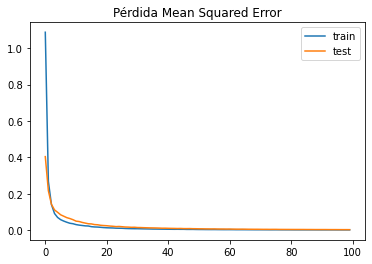

In [20]:
# Función Mean Squared error

# define model
model = build_model()

# fit model
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(train_X, train_y, verbose=0)
test_mse = model.evaluate(test_X, test_y, verbose=0)
print(f"Error Train: {train_mse}")
print(f"Error Test: {test_mse}")
# plot loss during training
plt.title('Pérdida Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Ejercicio: 
Implementar la función de error cuadrático medio y obtener los valores de "error train" y "error test".

## Evalución mediante función de pérdida de MLSE

Error de train 0.0019163736142218113
Error de train 0.005279581528156996


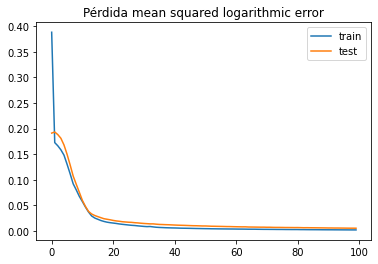

In [28]:
keras.backend.clear_session()
# mean_squared_logarithmic_error

# define model
model = build_model(loss = 'mean_squared_logarithmic_error')

# fit model
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=0)
# evaluate the model
train_mlse = model.evaluate(train_X, train_y, verbose=0)
test_mlse = model.evaluate(test_X, test_y, verbose=0)
print(f'Error de train {train_mlse}')
print(f'Error de train {test_mlse}')
# plot loss during training
plt.title('Pérdida mean squared logarithmic error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Evaluación mediante la función de pérdida de MAE:

Error de train 0.050360068678855896
Error de train 0.06191124767065048


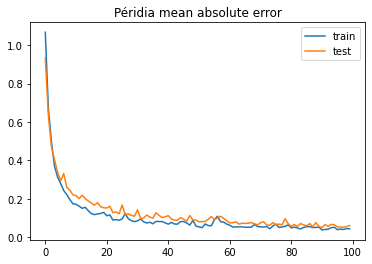

In [51]:
 keras.backend.clear_session()
 
 # Mean Absolute Error Loss

# define model
model = build_model(loss = 'mean_absolute_error')

# fit model
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=0)
# evaluate the model
train_mae = model.evaluate(train_X, train_y, verbose=0)
test_mae = model.evaluate(test_X, test_y, verbose=0)
print(f'Error de train {train_mae}')
print(f'Error de train {test_mae}')
# plot loss during training
plt.title('Péridia mean absolute error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Ejercicio: 
Implementar la función de error absoluto medio y obtener los valores de "error train" y "error test".

## **Concepto de entropía**

La entropía de una variabla aleatoria x, es el nivel de variaciones (nivel de incertidumbre) en las posibles salidas de la variable. Si $p(x)$ representa la distribución de probabilidades de una variable aleatoria $x$m la entropía se define como 

$$H(X) = \begin{cases}
- \int_x p(x)log(p(x))dx &\text{si $x$ es continua}\\
- \sum_x p(x)log(p(x)) &\text{si $x$ es discreta}
\end{cases}$$

### Ejercicio: Se tienen 3 contenedores con pelotas de colores dentro, con las siguientes características:

- Contenedor 1: 26 pelotas negras y 4 blancas.
- Contenedor 2: 14 pelotas negras y 16 blancas.
- Contenedor 3: 20 pelotas negras.

Calcule la entropia asociada en cada contenedor debido a la incertidumbre de sacar una pelota de un color dado.

## **Funciones de pérdida en el problema de clasificación binaria**

Las funciones de pérdidas principales en los casos de clasificación binaria son las siguientes:

* **Entropía cruzada**:

La entropia cruzada es la función de pérdida usada por defecto en los problemas de clasificación binaria. 

La entropía cruzada arrojará un puntaje que resume la diferencia promedio entre las distribuciones de probabilidad reales y las pronosticadas para predecir la clase. El puntaje se minimiza y el valor perfecto de la entropía cruzada es 0.

Matematicamente la entropía cruzada se define como:

$$ H_p(q)=-\frac{1}{N}\sum_{i=0}^n(y_i\text{log}(p(y_i))+(1-y_i)\text{log}(1-p(y_i)))$$

en donde $p(y)$ es la probabilidad de que un punto sea clase 1, dados todos los punto $n$. Un desarrollo intuitivo de la función de perdida de entropía cruzada puede encontrarse en el siguiente [enlace](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a).

* **Función de perdida Hinge:** 

Está destinada para la clasificación binaria donde los valores de la variable target están en el conjunto {-1, 1}.

Esta función de perdida incita a que los ejemplos a tengan el signo correcto asignando más error cuando hay una diferencia en el signo entre los valores de clase reales y predichos.  Para una mayor descripción ver el siguiente [enlace](https://medium.com/analytics-vidhya/understanding-loss-functions-hinge-loss-a0ff112b40a1).

* **Función de perdida Squared-Hinge**:

Una de las extensiones de la función de pérdida Hinge es la función de perdida squared-Hinge, la cual corresponde, simplemente, a la función Hinge elevadaa al cuadrado. Tiene el efecto de suavizar la superficie de la función de error para hacerla más fácil de trabajar desde el punto de vista numérico.

**Nota**: En el caso que veremos a continuación, las funciones Hinge y Squared-Hinge no son adecuadas dada la configuración del modelo dadas las fluctuaciones inducidas por la variaciones del ajuste de los pesos en estas funciones.

### Ejercicio

Para la siguiente tabla de clasificación binaria

$p_i$|Clase
--|--
0.778 | 1
0.467 | 1
0.081 | 0

Calcular la perdida de entropía cruzada binaria.

### Problema círculos concéntricos.

Usaremos la función de `scikit-learn` `make-circles`, mediante la cual generaremos dos grupos de círculos concéntricos de 1000 instancias y un ruido estadístico de un 10%:

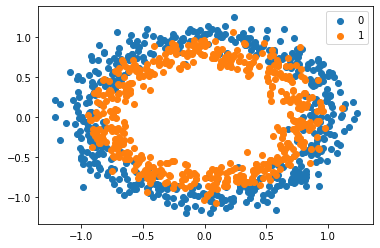

In [ ]:
# generación de círculos
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

In [ ]:
# Creación del modelo
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(50,input_dim=2, activation='relu',kernel_initializer='he_uniform'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

#### Entropía cruzada binaria.

Train: 0.834, Test: 0.848


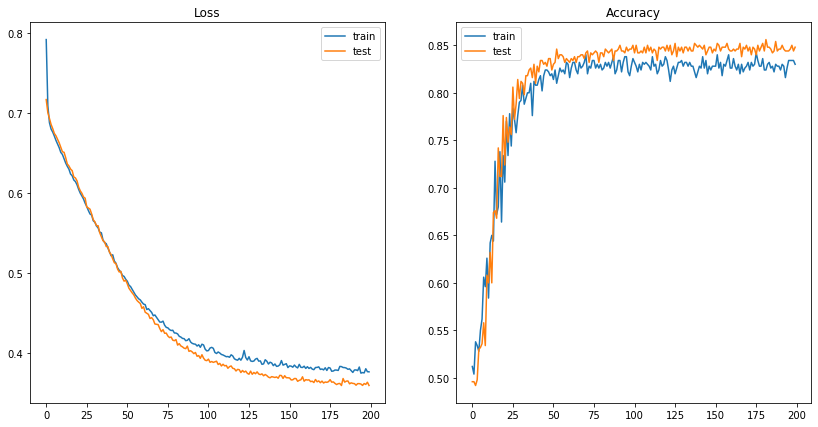

In [ ]:
# binary cross entropy:

keras.backend.clear_session()

# Prerprocesado de los datos

n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

model = build_model2()

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=200, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


#### Périda de Hinge

In [ ]:
# Hinge Loss:

keras.backend.clear_session()

# Prerprocesado de los datos

# change y from {0,1} to {-1,1}
y_HL = np.zeros_like(y)
y_HL[np.where(y == 0)]=-1
y_HL[np.where(y == 1)]=1

# change y from {0,1} to {-1,1}
#y[np.where(y == 0)] = -1

n_train = 500
train_y, test_y = y_HL[:n_train], y_HL[n_train:]

model = build_model2(activation='tanh', loss='hinge')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=200, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

#### Péridida de Hinge Cuadrática

Train: 0.310, Test: 0.332


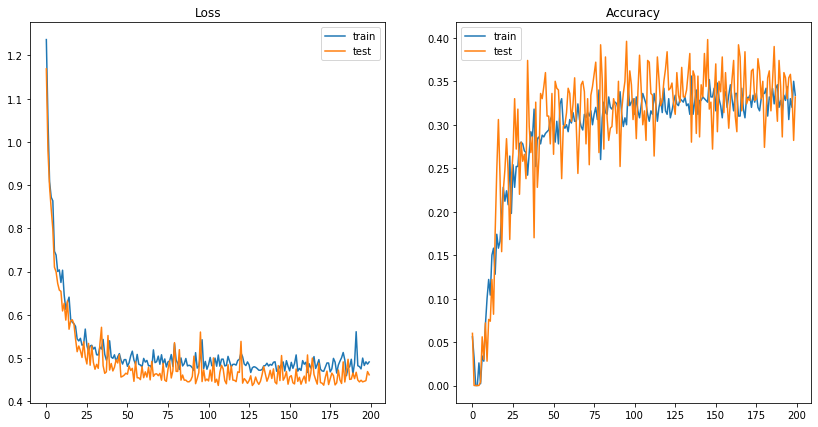

In [ ]:
# Squared Hinge Loss:
model = build_model2(activation='tanh', loss='squared_hinge')

history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=200, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## **Funciones de pérdida en el problema de clasificación multi-clase**

En el caso de clasificación multiclase, la función de perdida total se calcula como la suma sobre de la función de perdida para cada clase, por instancia, es decir:

$$-\sum_{c=1}^M y_{o,c}\text{log}(p_{o,c})$$

en donde $M$ es el número de clases, $y_{o,c}$ denota un indicador binario si la clase c corresponde a la clasificación correcta para la observación o, y $p_{o,c}$ inidica la probabilidad de que la observación o sea de la clase c.

En el caso de clasificaciones multiclase tendrelos las siguientes funciones de perdidas más comunes:

* **Función de entropía cruzada multiclase:**

Si la variable target estan codificadas de la forma **one-hot encoded**, se debe usar la función de entropia multiclase `categorical_crossentropy`. Si se tienen muchas clases es un dolor de cabeza usar el metodo de codificación **one-hot encoded**; en estos casos, es mejor usar una codificación entera, para lo cual se define otra función de perdida, la cual se define a renglón seguido.

* **Sparse Multiclass Cross-Entropy Loss**

En caso de que las variable target corresponde a enteros, se debe usar la entropía cruzada dispersa `sparse_categorical_crossentropy`.

* **Divergencia de Kullback Lieber (KL)**:

Es una medida de cómo una distribución de probabilidad difiere de una distribución de referencia. 

Si el valor es 0, ésto sugiere que las distribuciones son idénticas. En términos prácticos, la divergencia KL es muy similar a la entropía cruzada; en relación a que calcula la perdida de información (en términos de bits) si la distribución de probabilidad predicha se usa para aproximar la distribución de probabilidad target deseada. 

La divergencia KL se usa en los casos en los que el modelo a desarrollar es complejo, como en el caso que veremos en clases futuras del autoencoder usado para el aprendizaje de una representación densa de características, bajo un modelo que pretende reconstruir las entradas originales. No obstante, esta función de perdida puede ser usada en clasificación multiclase "simple", en cuyo caso es equivalente a la función de perdida multiclase de entropía cruzada. 


Usaremos la función de `scikit-learn` `make-blobs`, mediante la cual generaremos tres clases de círculos concéntricos de 1000 instancias con dos variables de entrada:

### Ejercicio:

Supónga que tiene la siguiente tabla

$p_i$| Clase
--|--
0.775| 1
0.116|0
0.039|0
0.070|0

Para un problema de clasificación multiclase con 4 clases. Determine la perdida mediante la función de entropías cruzada. 

### Problema de clasificación multiclase de blobs

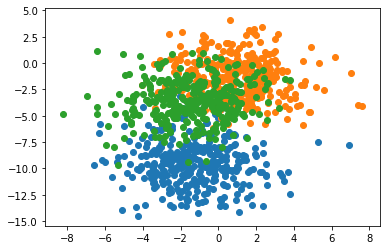

In [ ]:
# Generación de un dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

# select indices of points with each class label

plt.scatter(X[np.where(y == 0), 0], X[np.where(y == 0), 1])
plt.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1])
plt.scatter(X[np.where(y == 2), 0], X[np.where(y == 2), 1])
plt.show()

In [ ]:
# División de los datos:

y_c = keras.utils.to_categorical(y)

n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y_c[:n_train], y_c[n_train:]

In [ ]:
# Definición del modelo

def build_model3(loss='categorical_crossentropy'):
  # definición del modelo
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(keras.layers.Dense(3, activation='softmax'))
  # compile model
  opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

#### Entropía cruzada categórica.

Train: 0.820, Test: 0.834


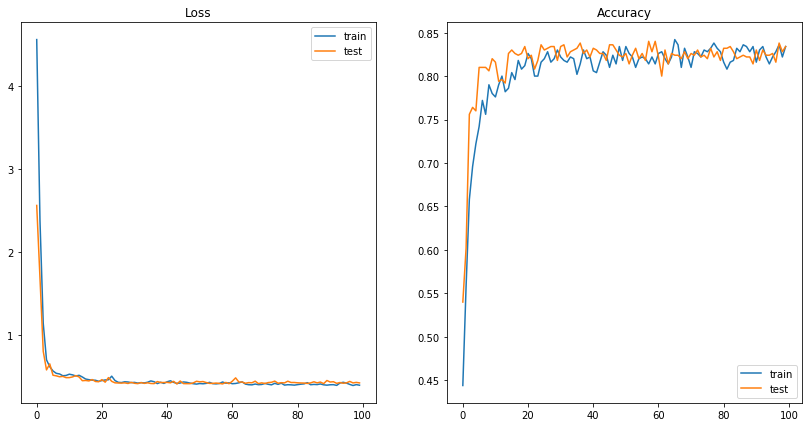

In [ ]:
# Categorical cross entropy
model = build_model3()

# Ajuste del modelo
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de la perdida durante el entrenamiento.
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de la presición durante el entrenamiento.
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

#### Entropía categórica cruzada dispersa.

In [ ]:
# División de los datos:

n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

Train: 0.800, Test: 0.788


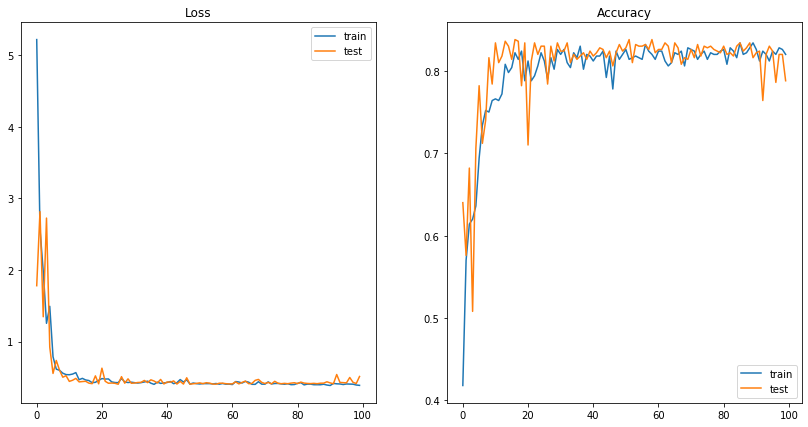

In [ ]:
# Sparse Multiclass Cross-Entropy Loss
model = build_model3(loss='sparse_categorical_crossentropy')

# Ajuste del modelo
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de la perdida durante el entrenamiento.
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de la presición durante el entrenamiento.
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

#### Divergencia de kullback-leibler

In [ ]:
# División de los datos:

y_c = keras.utils.to_categorical(y)

n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y_c[:n_train], y_c[n_train:]

Train: 0.824, Test: 0.820


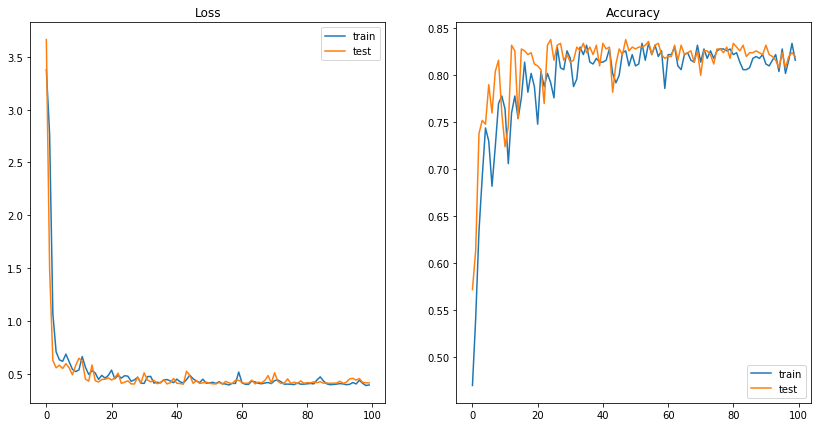

In [ ]:
# 'kullback_leibler_divergence'
model = build_model3(loss='kullback_leibler_divergence')

# Ajuste del modelo
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=100, verbose=0)

# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Gráficas:
plt.figure(figsize=(14,7))

# Gráfica de la perdida durante el entrenamiento.
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# Gráfica de la presición durante el entrenamiento.
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [56]:
import numpy as np

In [62]:
p1 = 1
p2 = 0
-(p1*np.log2(p1)+p2*np.log2(p2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


nan

In [ ]:
np.log